## One dimensional example of H$_2^+$

Soft Coulomb potential with Gaussian pseudo charges in 1D.  Dense linear algebra is used for simplicity

Lin Lin

Last revision:9/24/2018


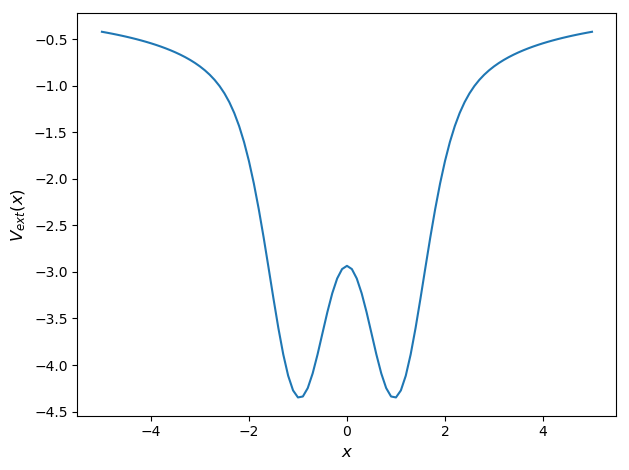

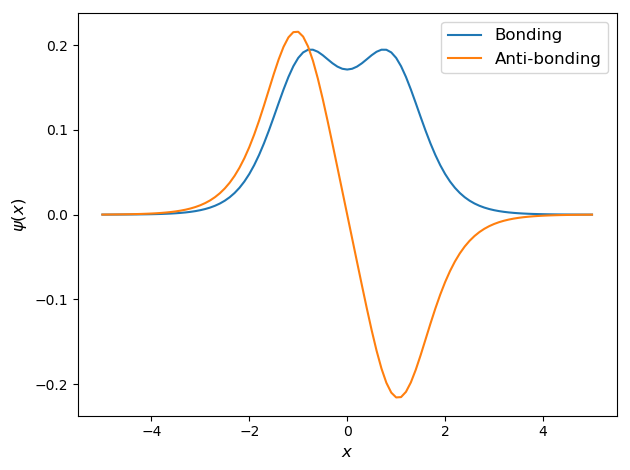

PyObject <matplotlib.legend.Legend object at 0x7f2739493ef0>

In [120]:
using LinearAlgebra


dx = 0.1

κ = 0.100
ϵ_0 = 1.0

Natoms = 2
R = [-1.0,1.0]
Z = [1.0,1.0]
sigma = [0.5,0.5]

vC(x) = 1.0 / (ϵ_0 * sqrt(x^2 + κ^2))

Ls = 5.0

gridpos = collect(range(-Ls,stop=Ls,step=dx))
Ns = length(gridpos)

vC_mat = [vC(gridpos[i]-gridpos[j]) for i in 1:Ns, j in 1:Ns]

rhoa_atom = zeros(Ns,Natoms)
rhoa = zeros(Ns)
for j = 1 : Natoms
    dist = gridpos .- R[j]
    @. rhoa_atom[:,j] = - Z[j] / sqrt(2*pi*sigma[j]^2) * (exp(-0.5*(dist/sigma[j])^2 ))
    rhoa .= rhoa + rhoa_atom[:,j]
end

Vext = vC_mat * rhoa * dx

Lap = 1.0 / (2.0*dx^2) * diagm(-1=>-ones(Ns-1),0=>2.0*ones(Ns),1=>-ones(Ns-1))

H = Lap + diagm(0=>Vext)

eigH = eigen(H)

energy = eigH.values[1:2]
psi = eigH.vectors[:,1:2]

using PyPlot
# plot(gridpos,vC_mat[:,1])
figure(1)
plot(gridpos,Vext)
xlabel(L"x")
ylabel(L"V_{ext}(x)")

figure(2)
plot(gridpos,psi[:,1:2])

xlabel(L"x")
ylabel(L"\psi(x)")
legend(("Bonding","Anti-bonding"))

## Linear combination of atomic orbital appoximation

Solve the atomic orbitals and perform linear combinations to approximate the solution of H$_2^+$


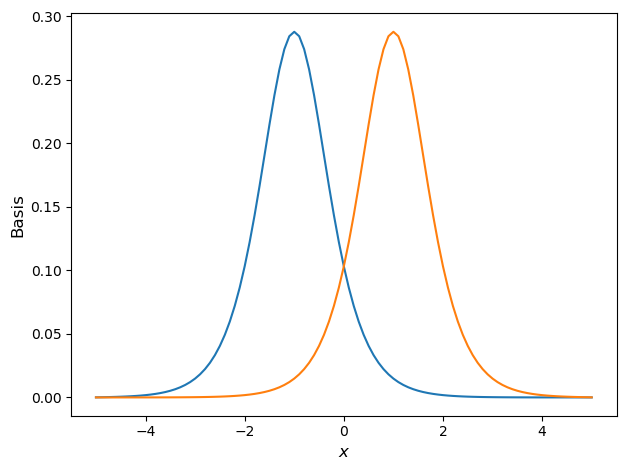

PyObject Text(25,0.5,'Basis')

In [97]:
Phi = zeros(Ns,Natoms)

for j = 1 : Natoms
    Vext_atom = vC_mat * rhoa_atom[:,j] * dx
    H_atom = Lap + diagm(0=>Vext_atom)
    Phi[:,j] = eigvecs(H_atom)[:,1]
end

figure(1)
plot(gridpos,Phi[:,1:2])
xlabel(L"x")
ylabel("Basis")


In [114]:
# Solve the generalized eigenvalue problem
H_proj = Phi'*(H*Phi)
S_proj = Phi'*Phi

display(H_proj)

display(S_proj)

2×2 Array{Float64,2}:
 -3.21478   -0.858493
 -0.858493  -3.21478 

2×2 Array{Float64,2}:
 1.0       0.196448
 0.196448  1.0     

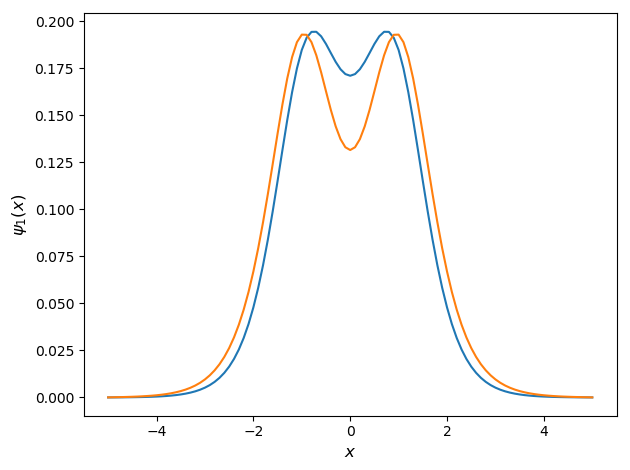

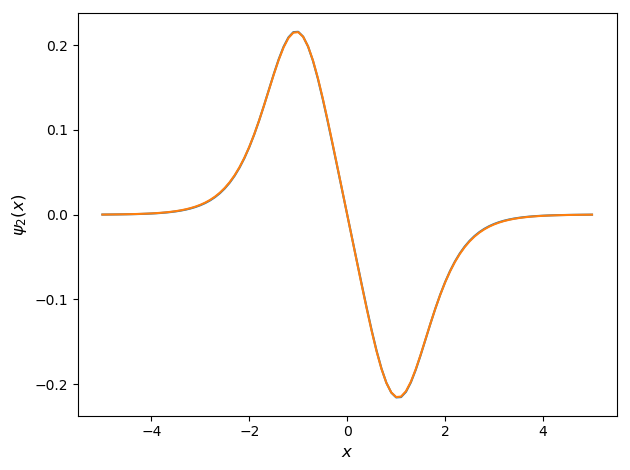

     1st eigenvalue:-3.456506742753703
LCAO 1st eigenvalue:-3.4044697148510785
     2nd eigenvalue:-2.932433602929706
LCAO 2nd eigenvalue:-2.932337524483932


PyObject Text(29,0.5,'$\\psi_2(x)$')

In [116]:
eigH_proj = eigen(H_proj,S_proj)

energy_proj = eigH_proj.values
psi_proj = Phi * eigH_proj.vectors

# Normalize and align psi_proj with psi
# Solve the minimization problem
#
# min_U ||psi_proj * U - psi||_F^2
#
# for 2x2 matrix U
psi_proj = psi_proj * (inv(psi_proj'*psi_proj) * (psi_proj'*psi))


println("     1st eigenvalue:", energy[1])
println("LCAO 1st eigenvalue:", energy_proj[1])
println("     2nd eigenvalue:", energy[2])
println("LCAO 2nd eigenvalue:", energy_proj[2])


figure(1)
plot(gridpos,psi[:,1],gridpos,psi_proj[:,1])
xlabel(L"x")
ylabel(L"\psi_1(x)")


figure(2)
plot(gridpos,psi[:,2],gridpos,psi_proj[:,2])
xlabel(L"x")
ylabel(L"\psi_2(x)")


Let us include more atomic orbitals to improve the approximation

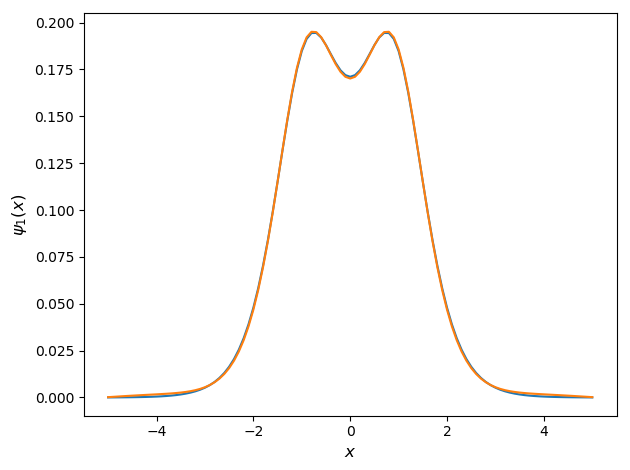

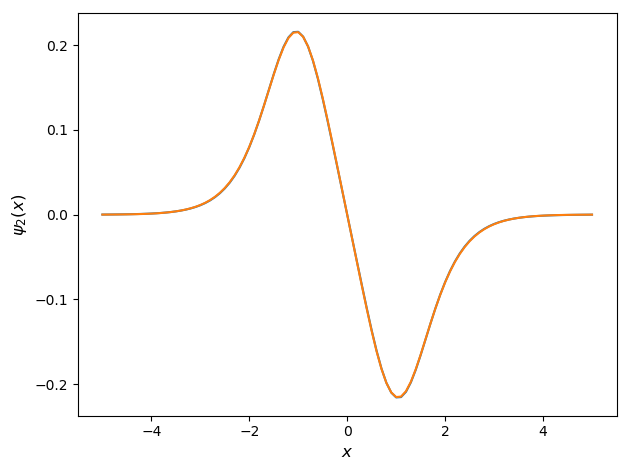

     1st eigenvalue:-3.456506742753703
LCAO 1st eigenvalue:-3.456249929007059
     2nd eigenvalue:-2.932433602929706
LCAO 2nd eigenvalue:-2.932343546125389


PyObject Text(29,0.5,'$\\psi_2(x)$')

In [119]:
# This means I am including s,p,d for each atom
Nb = 3
Phi = zeros(Ns,Natoms * Nb)

for j = 1 : Natoms
    Vext_atom = vC_mat * rhoa_atom[:,j] * dx
    H_atom = Lap + diagm(0=>Vext_atom)
    Phi[:,(j-1)*Nb+1:j*Nb] = eigvecs(H_atom)[:,1:Nb]
end

# Solve the generalized eigenvalue problem
H_proj = Phi'*(H*Phi)
S_proj = Phi'*Phi


eigH_proj = eigen(H_proj,S_proj)

energy_proj = eigH_proj.values[1:2]
psi_proj = Phi * eigH_proj.vectors[:,1:2]

# Normalize and align psi_proj with psi
# Solve the minimization problem
#
# min_U ||psi_proj * U - psi||_F^2
#
# for 2x2 matrix U
psi_proj = psi_proj * (inv(psi_proj'*psi_proj) * (psi_proj'*psi))


println("     1st eigenvalue:", energy[1])
println("LCAO 1st eigenvalue:", energy_proj[1])
println("     2nd eigenvalue:", energy[2])
println("LCAO 2nd eigenvalue:", energy_proj[2])


figure(1)
plot(gridpos,psi[:,1],gridpos,psi_proj[:,1])
xlabel(L"x")
ylabel(L"\psi_1(x)")


figure(2)
plot(gridpos,psi[:,2],gridpos,psi_proj[:,2])
xlabel(L"x")
ylabel(L"\psi_2(x)")